In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sn
import codecs
import statsmodels as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sc
from scipy import stats
from patsy import dmatrices
import matplotlib as mt
from scipy import stats
from statsmodels.formula.api import logit, probit, poisson, ols
from statsmodels import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression

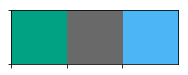

In [2]:
# setting palette
pal = ["#01A183", "#696969", "#4Cb5F5"]
sn.palplot(sn.color_palette(pal))

In [3]:
#all = pd.read_excel("C:\\Users\\swidrak\\Documents\\Python Scripts\\social_influence\\ultimatum2.xlsx")

# upload the database from github!

In [4]:
url = 'https://github.com/swidrak/social_influence/blob/master/ultimatum2.xlsx?raw=true'
all = pd.read_excel(url)

In [5]:
all

,IDround,country,id,ID,block,round,cut,cut2,rundaBlok,parPro,...,Zhdf,Zmras,Znft,ZsocPres,Zemb,Zstat,Zdisgust,Zdisgust_s,cult,offerParC
0,b3id0r1,cat,0,3_0,1,1,keep,keep,0,1,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,generous
1,b3id0r2,cat,0,3_0,1,2,keep,keep,1,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,fair
2,b3id0r3,cat,0,3_0,1,3,keep,keep,2,1,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,fair
4,b3id0r5,cat,0,3_0,1,5,keep,keep,4,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,fair
5,b3id0r6,cat,0,3_0,1,6,keep,keep,5,1,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,generous
6,b3id0r7,cat,0,3_0,1,7,keep,keep,6,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,generous
8,b3id0r9,cat,0,3_0,1,9,keep,keep,8,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,fair
9,b3id0r10,cat,0,3_0,1,10,keep,keep,9,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,unfair
10,b3id0r11,cat,0,3_0,0,11,keep,keep,0,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,generous
11,b3id0r12,cat,0,3_0,0,12,keep,keep,1,0,...,1.496827,-0.596628,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.877220,0,fair


In [6]:
all.tail()

,IDround,country,id,ID,block,round,cut,cut2,rundaBlok,parPro,...,Zhdf,Zmras,Znft,ZsocPres,Zemb,Zstat,Zdisgust,Zdisgust_s,cult,offerParC
1034,b4id32r15,pl,32,4_32,1,15,keep,keep,4,0,...,0.4659,-0.692978,-0.800311,-0.456737,-0.059896,-1.574335,0.001241,0.896713,1,fair
1035,b4id32r16,pl,32,4_32,1,16,keep,keep,5,1,...,0.4659,-0.692978,-0.800311,-0.456737,-0.059896,-1.574335,0.001241,0.896713,1,generous
1036,b4id32r17,pl,32,4_32,1,17,keep,keep,6,0,...,0.4659,-0.692978,-0.800311,-0.456737,-0.059896,-1.574335,0.001241,0.896713,1,generous
1038,b4id32r19,pl,32,4_32,1,19,keep,keep,8,0,...,0.4659,-0.692978,-0.800311,-0.456737,-0.059896,-1.574335,0.001241,0.896713,1,fair
1039,b4id32r20,pl,32,4_32,1,20,keep,keep,9,0,...,0.4659,-0.692978,-0.800311,-0.456737,-0.059896,-1.574335,0.001241,0.896713,1,unfair


In [7]:
all = all[all["cut"] == "keep"]
all = all[all["cut2"] == "keep"]

In [8]:
all['cult'] = all.loc[:,('country')].apply(lambda x: 1 if x == "pl" else 0)

In [9]:
#df['new'] =  df['old'].apply(lambda x: 0 if x<0.5 else 1)
all['offerParC'] = all.loc[:,'offerPar'].apply(lambda x: "unfair" if x < 36 else ("fair" if x > 36 and x < 46 else "generous"))

In [10]:
all["atg"].mean()

3.4788461538461557

In [11]:
all['atgMed'] = all.loc[:,('atg')].apply(lambda x: 1 if x > 3.48 else 0)

In [12]:
pro = all[all["parPro"] == 1]
res = all[all["parPro"] == 0]

pl = all[all["country"] == "pl"]
ca = all[all["country"] == "cat"]

plpro = pl[pl["parPro"] == 1]
capro = ca[ca["parPro"] == 1]

plres = pl[pl["parPro"] == 0]
cares = ca[ca["parPro"] == 0]

In [13]:
#pro = all[all["parPro"] == 1]
#res = all[all["parPro"] == 0]

resyes = res[res["accepted"] == 1]
resno = res[res["accepted"] == 0]

In [14]:
#res["offerParC"]

In [15]:
#new columns - agent label instead of a number
res['name'] = res.loc[:,'agent'].apply(lambda x: "low status" if x == 0 else "high status")

pro['name'] = pro.loc[:,'agent'].apply(lambda x: "low status" if x == 0 else "high status")

C:\Users\swidrak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\swidrak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
#trying to change the format of the data
all['touch2'] = all.loc[:,('touch')].apply(lambda x: 0 if x == 0.0 else 1)

In [17]:
#all.to_excel("C:\\Users\\Justyna\\Python Scripts\\ultimatum2\\data\\allcut.xlsx")

In [18]:
pro.head()

,IDround,country,id,ID,block,round,cut,cut2,rundaBlok,parPro,...,Znft,ZsocPres,Zemb,Zstat,Zdisgust,Zdisgust_s,cult,offerParC,atgMed,name
0,b3id0r1,cat,0,3_0,1,1,keep,keep,0,1,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,generous,0,low status
2,b3id0r3,cat,0,3_0,1,3,keep,keep,2,1,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,fair,0,high status
5,b3id0r6,cat,0,3_0,1,6,keep,keep,5,1,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,generous,0,low status
12,b3id0r13,cat,0,3_0,0,13,keep,keep,2,1,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,generous,0,low status
15,b3id0r16,cat,0,3_0,0,16,keep,keep,5,1,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,generous,0,high status


In [19]:
res.head()

,IDround,country,id,ID,block,round,cut,cut2,rundaBlok,parPro,...,Znft,ZsocPres,Zemb,Zstat,Zdisgust,Zdisgust_s,cult,offerParC,atgMed,name
1,b3id0r2,cat,0,3_0,1,2,keep,keep,1,0,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,fair,0,high status
4,b3id0r5,cat,0,3_0,1,5,keep,keep,4,0,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,fair,0,low status
6,b3id0r7,cat,0,3_0,1,7,keep,keep,6,0,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,generous,0,high status
8,b3id0r9,cat,0,3_0,1,9,keep,keep,8,0,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,fair,0,low status
9,b3id0r10,cat,0,3_0,1,10,keep,keep,9,0,...,-1.371264,1.769854,0.563018,-0.314867,-0.579451,-0.87722,0,unfair,0,high status


In [20]:
print(res[["country", "touch", "agent","accepted"]].corr())

             touch     agent  accepted
touch     1.000000  0.028571  0.195454
agent     0.028571  1.000000  0.054202
accepted  0.195454  0.054202  1.000000


In [21]:
#plt.plot?

C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


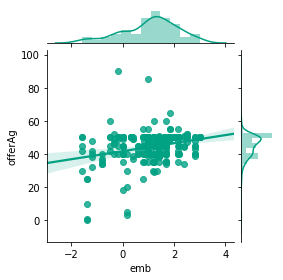

In [22]:
sn.jointplot(x="emb", 
              y="offerAg", 
              stat_func= None,
              data=pro, 
              kind="reg", 
              size =4,
              color = "#01A183")

In [23]:
sn.jointplot?

Signature: sn.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x0000013C4FBA7620>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : strings or vectors
    Data or names of variables in ``data``.
data : DataFrame, optional
    DataFrame when ``x`` and ``y`` are variable names.
kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
    Kind of plot to draw.
stat_func : callable or None, optional
    Function used to calculate a statistic about the relationship and
    annotate the plot. Should map `x` and `y` either to a sing

C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


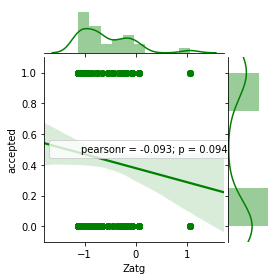

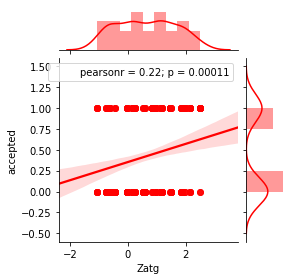

In [24]:
sn.jointplot(x="Zatg", 
              y="accepted", 
              #stat_func=sk.linear_model.LogisticRegression(),
              data=res[res['cult']==0], 
              kind="reg", 
              size =4,
              color = "green", 
              ylim=(-0.1,1.1),
              space=0.1, 
              ratio=4)

sn.jointplot(x="Zatg", 
              y="accepted", 
              #stat_func=sk.linear_model.LogisticRegression(),
              data=res[res['cult']==1], 
              kind="reg", 
              size =4,
              color = "red",
              #ylim=(0.1,1.1),
              #space=0.0, 
              ratio=4)

## Logistic regression plot

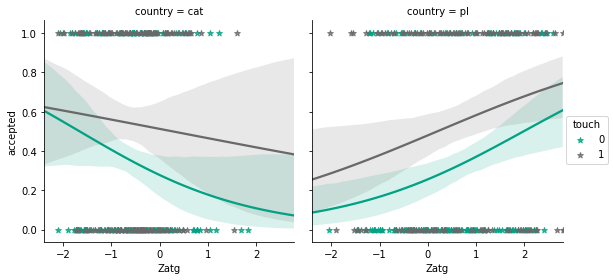

In [62]:
sn.lmplot(x = 'Zatg', y = 'accepted', data = res, hue='touch', 
               col='country', 
               #row='country', 
               palette=pal, col_wrap=None, 
               size=4, 
               aspect=1, markers='*', 
               sharex=True, sharey=True, logistic=True, x_jitter=True, y_jitter=False)

C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


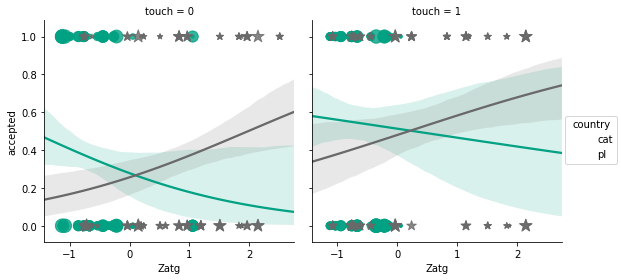

In [103]:
size = 100 * pro.Zemb
sn.lmplot('Zatg', 'accepted', res, hue='country', 
               #row='offerParC', 
               col='touch', 
               palette=pal, 
               size=4, fit_reg=True, scatter_kws={'s':size},
               aspect=1, markers=['o', '*'], 
               sharex=True, sharey=True, logistic=True,  
               x_jitter=False, y_jitter=False)

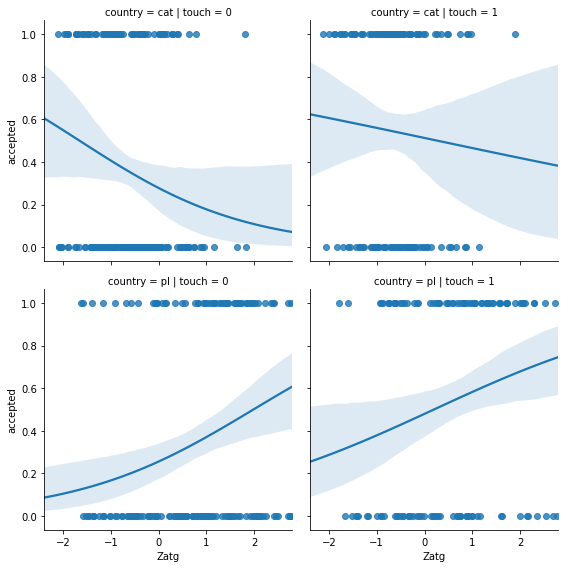

In [74]:
sn.lmplot('Zatg', 'accepted', res, #hue='country', 
               row='country', col='touch', 
               palette=pal, col_wrap=None, 
               size=4, fit_reg=True,
               aspect=1, markers='o', 
               sharex=True, sharey=True, logistic=True,  x_jitter=True, y_jitter=False)

## Linear regression plot

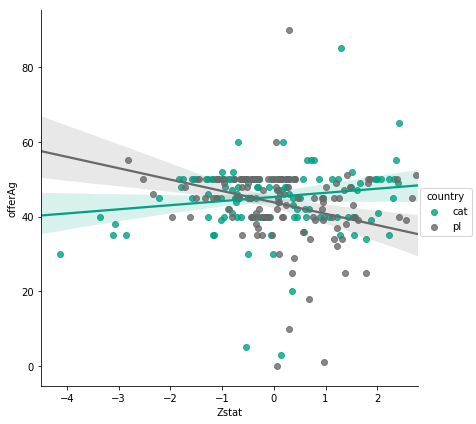

In [80]:
sn.lmplot('Zstat', 'offerAg', pro, hue='country', 
               col=None, row=None, 
               palette=pal, col_wrap=None, 
               size=6, fit_reg=True, #units = 'Zemb',
               aspect=1, markers='o', 
               sharex=True, sharey=True, logistic=False, x_jitter=True, y_jitter=False)



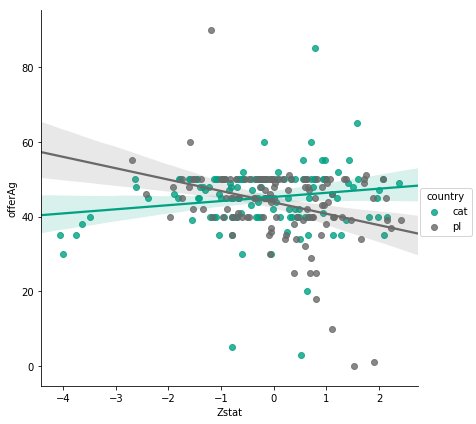

In [88]:
sn.lmplot('Zstat', 'offerAg', pro, hue='country', 
               col=None, row=None, 
               palette=pal, col_wrap=None, 
               size=6, fit_reg=True, 
               aspect=1, markers='o', 
               sharex=True, sharey=True, logistic=False, x_jitter=True, y_jitter=False)

C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


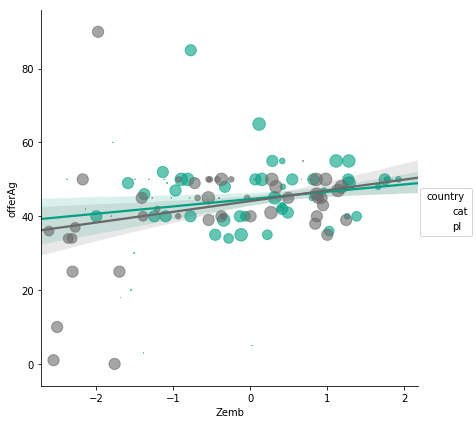

In [106]:
size = 100 * pro.Zstat
g = sn.lmplot('Zemb', 'offerAg', pro, hue='country', 
               col=None, row=None, 
               palette=pal, col_wrap=None, 
               size=6, 
               aspect=1, markers='o', scatter_kws={'s':size, 'alpha':.6},
               sharex=True, sharey=True, logistic=False, x_jitter=True, y_jitter=False)

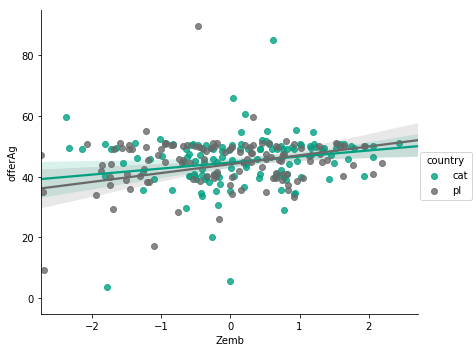

In [57]:
sn.lmplot('Zemb', 'offerAg', pro, hue='country',
               col=None, row=None, 
               palette=pal, col_wrap=None, 
               #height=5, 
               aspect=1.2, markers='o', 
               sharex=True, sharey=True, logistic=False, x_jitter=True, y_jitter=True,)

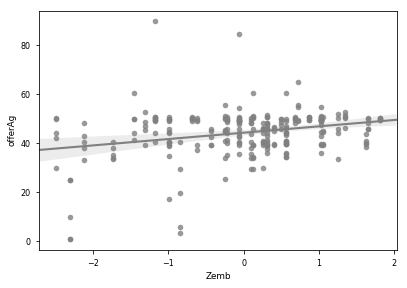

In [168]:
sn.regplot('Zemb', 'offerAg',  data=pro, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=True, label=None, color='grey', marker='o')

C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\swidrak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


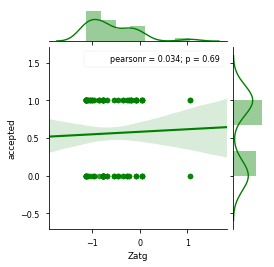

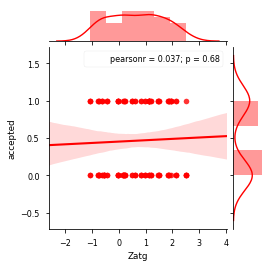

In [170]:
sn.jointplot(x="Zatg", 
              y="accepted", 
              data=pro[pro['cult']==0], 
              kind="reg", 
              size =4,
              color = "green")

sn.jointplot(x="Zatg", 
              y="accepted", 
              data=pro[pro['cult']==1], 
              kind="reg", 
              size =4,
              color = "red")

In [64]:
sn.jointplot?

Signature: sn.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x000001FB22A73E18>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
x, y : strings or vectors
    Data or names of variables in ``data``.
data : DataFrame, optional
    DataFrame when ``x`` and ``y`` are variable names.
kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
    Kind of plot to draw.
stat_func : callable or None, optional
    Function used to calculate a statistic about the relationship and
    annotate the plot. Should map `x` and `y` either to a sing

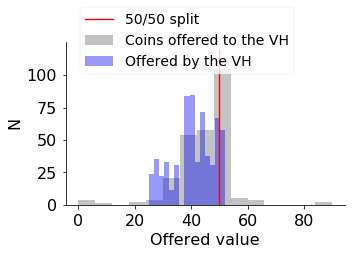

In [27]:
mt.style.use('seaborn-paper')

f = plt.figure(figsize=(5,3))
plt.hist(x = "offerAg", data = pro, bins = 15, alpha = 0.4, color="#696969")
plt.hist(x = "offerPar", data = res, bins = 15, alpha = 0.4, color = "#0100f8")

plt.plot([50,50],[0,120], color = "red")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Offered value', fontsize=16)
plt.ylabel('N', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0, 25, 50, 75,100], fontsize=16)
#plt.ylim(-5, 100)
#plt.xlim(-3, 2.5)

#legend
plt.legend(('50/50 split','Coins offered to the VH', 'Offered by the VH'), 
           loc=[0.05, 0.8], 
           fontsize=14)

#f.savefig('offers.png', transparent=True, figsize=(8,6))

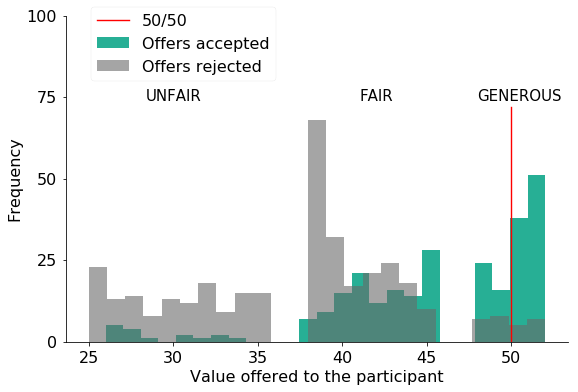

In [28]:
mt.style.use('seaborn-paper')

f = plt.figure(figsize=(9,6))

plt.hist(x = "offerPar", data = resyes, 
         bins = 25, 
         alpha = 0.85, 
         color = "#01A183") #green

plt.hist(x = "offerPar", data = resno, 
         bins = 25, 
         alpha = 0.6,
         color = "#696969")  #grey

plt.plot([50,50], [0,72], color = "red")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Value offered to the participant', fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks([0, 25, 50, 75,100], fontsize=16)
#plt.ylim(-5, 100)
#plt.xlim(-3, 2.5)

#categories
plt.text(x = 30, y = 74, horizontalalignment = 'center', s = "UNFAIR", fontsize = 15)
plt.text(x = 42, y = 74, horizontalalignment = 'center', s = "FAIR", fontsize = 15)
plt.text(x = 48, y = 74, horizontalalignment = 'left', s = "GENEROUS", fontsize = 15)

#legend
plt.legend(('50/50','Offers accepted', 'Offers rejected'), 
           loc=[0.05, 0.8], fontsize=16)

f.savefig('acceptedReject.png',  transparent=True, figsize=(7,6), dpi = 300)

In [29]:
#plt.text?

# ANOVA FINALLY! (or GLM?)

We start by using ordinary least squares method and then the anova_lm method. Also, if you are familiar with R-syntax. Statsmodels have a formula api where your model is very intuitively formulated. First, we import the api and the formula api. Second we, use ordinary least squares regression with our data. The object obtained is a fitted model that we later use with the anova_lm method to obtaine a ANOVA table.

In [30]:
from statsmodels.formula.api import ols
 
mod = ols('offerAg ~ cult*agent',
                data=pro).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq     df         F    PR(>F)
cult          189.900450    1.0  2.107965  0.147759
agent           1.869231    1.0  0.020749  0.885578
cult:agent    112.127214    1.0  1.244653  0.265622
Residual    23062.299259  256.0       NaN       NaN


In [31]:
# As can be seen in the ANOVA table Statsmodels don’t provide an effect size .  
# To calculate eta squared we can use the sum of squares from the table:

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("eta square = ", esq_sm)

eta square =  0.9902527304611197


In [32]:
#hist? 

# Scatter plot

In [33]:
#plt.scatter?

(-3, 3.5)

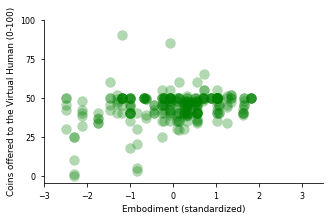

In [34]:
##ustawienie czcionki 
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

g = plt.figure(figsize=(5,3), frameon=False)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.scatter(x = "Zemb", y = "offerAg",  data = pro, 
            norm = (0,5), 
            marker = "o", 
            s = 100, 
            alpha = 0.3, 
            color = "green")


plt.xlabel('Embodiment (standardized)')
plt.ylabel('Coins offered to the Virtual Human (0-100)')
plt.xticks(range(-3, 4))
plt.yticks([0, 25,50,75, 100])
#plt.ylim(-5, 100)
plt.xlim(-3, 3.5)

#g.savefig('emb x offerAg.png',  transparent=True, figsize=(7,6), dpi = 300)

In [46]:
plt.scatter?

Signature: plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
Docstring:
A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional, default: 'b'
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to be
    colormapped. If you want to specify t

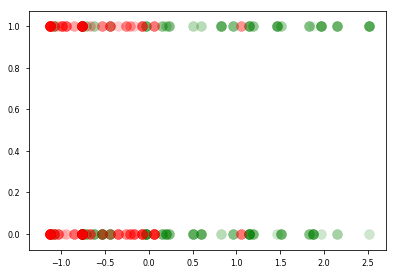

In [81]:
plt.scatter(x = "Zatg", y = "accepted",  data = res[res['cult']==1], 
            norm = (0,5), 
            marker = "o", 
            s = 100, 
            alpha = 0.1, 
            color = "green")

plt.scatter(x = "Zatg", y = "accepted",  data = res[res['cult']==0], 
            norm = (0,5), 
            marker = "o", 
            s = 100, 
            alpha = 0.1, 
            color = "red")

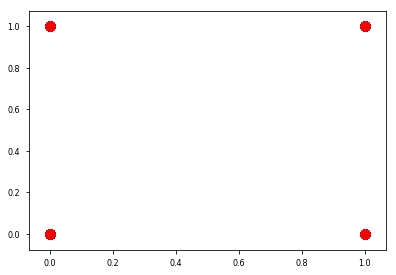

In [82]:
plt.scatter(x = "touch", y = "accepted",  data = res[res['cult']==1], 
            norm = (0,5), 
            marker = "o", 
            s = 100, 
            alpha = 0.1, 
            color = "green")


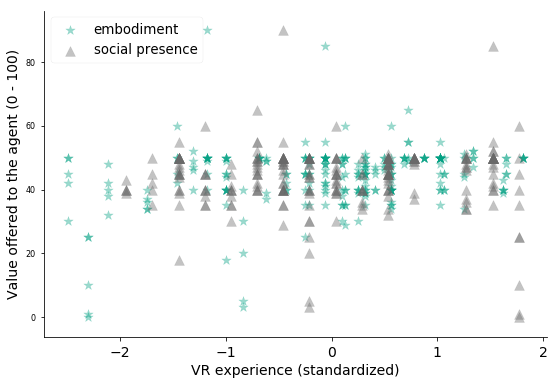

In [29]:
g = plt.figure(figsize=(9,6), frameon=False)

##ustawienie czcionki 
font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

#plotting data
plt.scatter(x = "Zemb", y = "offerAg",  data = pro, 
            #norm = (0,5),  
            s = 100, 
            alpha = 0.4, 
            color = "#01A183", 
            marker="*")

plt.scatter(x = "ZsocPres", y = "offerAg",  data = pro, #norm = (0,1), 
            s = 100, 
            alpha = 0.4, 
            color = "#696969", 
            marker="^")


#no ticks
plt.tick_params(top=False, bottom=True, left=False, right=True) #labelleft=True, labelbottom=True)
plt.xticks(fontsize=14)
#plt.yticks([0, 25, 50, 75, 100], fontsize=14)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#labels
plt.xlabel('VR experience (standardized)', fontsize=14)
plt.ylabel('Value offered to the agent (0 - 100)', fontsize=14)

#scale on y and x axes
#plt.ylim(-5, 100)
#plt.xlim(-3, 2.5)

#legend
plt.legend(('embodiment', 'social presence'), loc="upper left" , fontsize='small')

#saving
g.savefig('scatter.png',  transparent=True, figsize=(9,6), dpi = 300)

In [29]:
#plt.scatter?

# H1
### People will play ultimatum game with embodied agents “mindlessly”, treating them as if they were humans. 
#### This implies they will make rather fair offers (60/40, ref.) because of altruism and/or fear of being punished for too greedy offers.

In [31]:
print(res.groupby(["cult"])["accepted"].describe())
print(pro.groupby("agent")["name"].describe())

      count      mean       std  min  25%  50%  75%  max
cult                                                    
0     324.0  0.376543  0.485268  0.0  0.0  0.0  1.0  1.0
1     300.0  0.380000  0.486197  0.0  0.0  0.0  1.0  1.0
      count unique          top freq
agent                               
0.0     156      1   low status  156
1.0     104      1  high status  104


In [32]:
print(res.groupby(["country", "name"])["accepted"].mean()*100)
print(res.groupby(["country", "name"])["accepted"].std()*100)

country  name       
cat      high status    39.506173
         low status     35.802469
pl       high status    41.333333
         low status     34.666667
Name: accepted, dtype: float64
country  name       
cat      high status    49.037981
         low status     48.090603
pl       high status    49.408130
         low status     47.750283
Name: accepted, dtype: float64


## PARTICIPANT RESPONDER

In [33]:
res.describe()

,id,block,round,rundaBlok,parPro,prevParPro,touch,prevTouch,offerAg,offerPar,...,Zhdf,Zmras,Znft,ZsocPres,Zemb,Zstat,Zdisgust,Zdisgust_s,cult,atgMed
count,624.000000,624.000000,624.000000,624.000000,624.0,624.000000,624.000000,624.000000,624.000000,624.000000,...,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,6.240000e+02,624.000000,624.000000
mean,16.442308,0.416667,11.467949,5.500000,0.0,0.333333,0.500000,0.354167,60.931090,39.068910,...,3.638471e-16,-1.618719e-15,1.740061e-16,-2.539457e-15,-2.290480e-15,4.611696e-16,-4.360159e-15,-2.477007e-15,0.480769,0.384615
std,8.560794,0.493402,5.715480,2.755994,0.0,0.471783,0.500401,0.478644,7.443747,7.443747,...,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,1.000321e+00,0.500031,0.486895
min,0.000000,0.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000,48.000000,25.000000,...,-2.111418e+00,-2.138225e+00,-2.766928e+00,-1.941131e+00,-2.489260e+00,-3.148670e+00,-2.515091e+00,-1.510767e+00,0.000000,0.000000
25%,9.750000,0.000000,7.000000,3.750000,0.0,0.000000,0.000000,0.000000,56.000000,33.000000,...,-6.294604e-01,-7.170651e-01,-6.734322e-01,-7.041357e-01,-6.360910e-01,-6.297340e-01,-7.084937e-01,-6.238006e-01,0.000000,0.000000
50%,17.000000,0.000000,10.000000,6.000000,0.0,0.000000,0.500000,0.000000,60.000000,40.000000,...,-4.956381e-02,-1.148786e-01,2.439972e-02,-8.563812e-02,1.269786e-01,5.600000e-16,1.240795e-03,-1.803174e-01,0.000000,0.000000
75%,23.250000,1.000000,17.000000,8.000000,0.0,1.000000,1.000000,1.000000,67.000000,44.000000,...,7.236316e-01,8.486196e-01,5.953531e-01,5.947092e-01,5.941641e-01,6.297340e-01,4.528900e-01,4.215528e-01,1.000000,1.000000
max,32.000000,1.000000,20.000000,9.000000,0.0,1.000000,1.000000,1.000000,75.000000,52.000000,...,1.754559e+00,2.101167e+00,2.435092e+00,1.769854e+00,1.808846e+00,1.889202e+00,3.549913e+00,3.811032e+00,1.000000,1.000000


## three categories of the offers: 
- generous (46 – 52 coins offered to the participant), 
- fair (38 – 45 coins for the participant)
- unfair (25 – 35 coins for the participant). 

In [34]:
#acceptance rate by country
res.groupby("cult")["accepted"].describe()

,count,mean,std,min,25%,50%,75%,max
cult,,,,,,,,
0,324.0,0.376543,0.485268,0.0,0.0,0.0,1.0,1.0
1,300.0,0.380000,0.486197,0.0,0.0,0.0,1.0,1.0


In [35]:
#acceptance rate by country and category
res.groupby(["offerParC", "country"])["accepted"].describe()

count      mean       std  min  25%  50%  75%  max
offerParC country                                                    
fair      cat      162.0  0.382716  0.487557  0.0  0.0  0.0  1.0  1.0
          pl       150.0  0.400000  0.491539  0.0  0.0  0.0  1.0  1.0
generous  cat       54.0  0.944444  0.231212  0.0  1.0  1.0  1.0  1.0
          pl        50.0  0.800000  0.404061  0.0  1.0  1.0  1.0  1.0
unfair    cat      108.0  0.083333  0.277674  0.0  0.0  0.0  0.0  1.0
          pl       100.0  0.140000  0.348735  0.0  0.0  0.0  0.0  1.0

In [36]:
#acceptance rate by country and category
res.groupby(["offerParC", "country"])["accepted"].std()*100

offerParC  country
fair       cat        48.755700
           pl         49.153915
generous   cat        23.121228
           pl         40.406102
unfair     cat        27.767392
           pl         34.873509
Name: accepted, dtype: float64

In [37]:
res.groupby(["country", "offerParC","name"])["accepted"].describe()

count      mean       std  min  25%  50%  75%  \
country offerParC name                                                         
cat     fair      high status   81.0  0.444444  0.500000  0.0  0.0  0.0  1.0   
                  low status    81.0  0.320988  0.469765  0.0  0.0  0.0  1.0   
        generous  high status   27.0  0.888889  0.320256  0.0  1.0  1.0  1.0   
                  low status    27.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
        unfair    high status   54.0  0.074074  0.264351  0.0  0.0  0.0  0.0   
                  low status    54.0  0.092593  0.292582  0.0  0.0  0.0  0.0   
pl      fair      high status   75.0  0.466667  0.502247  0.0  0.0  0.0  1.0   
                  low status    75.0  0.333333  0.474579  0.0  0.0  0.0  1.0   
        generous  high status   25.0  0.760000  0.435890  0.0  1.0  1.0  1.0   
                  low status    25.0  0.840000  0.374166  0.0  1.0  1.0  1.0   
        unfair    high status   50.0  0.160000  0.370328  0.0  0.0  0.0  0.0   
                  low status    50.0  0.120000  0.328261  0.0  0.0  0.0  0.0   

                               max  
country offerParC name              
cat     fair      high status  1.0  
                  low status   1.0  
        generous  high status  1.0  
                  low status   1.0  
        unfair    high status  1.0  
                  low status   1.0  
pl      fair      high status  1.0  
                  low status   1.0  
        generous  high status  1.0  
                  low status   1.0  
        unfair    high status  1.0  
                  low status   1.0

In [38]:
print(res.groupby(["country", "name", "offerParC"])["accepted"].mean()*100) 


country  name         offerParC
cat      high status  fair          44.444444
                      generous      88.888889
                      unfair         7.407407
         low status   fair          32.098765
                      generous     100.000000
                      unfair         9.259259
pl       high status  fair          46.666667
                      generous      76.000000
                      unfair        16.000000
         low status   fair          33.333333
                      generous      84.000000
                      unfair        12.000000
Name: accepted, dtype: float64


In [39]:
res.groupby(["offerParC", "name", "country"])["accepted"].std()*100

offerParC  name         country
fair       high status  cat        50.000000
                        pl         50.224720
           low status   cat        46.976485
                        pl         47.457900
generous   high status  cat        32.025631
                        pl         43.588989
           low status   cat         0.000000
                        pl         37.416574
unfair     high status  cat        26.435053
                        pl         37.032804
           low status   cat        29.258242
                        pl         32.826072
Name: accepted, dtype: float64

## PARTICIPANT PROPOSER

In [40]:
#cutting into categories (into defined number of even categories or with defined bins)

bins = pd.IntervalIndex.from_tuples(((0,10), (10,20), (20,30), (30,40), 
                                     (40,50), (50,60), (60,70), (70,80),
                                    (80,90), (90,100)))

pro.loc[:,"offerAgC"] = pd.cut(x = pro.loc[:,"offerAg"], bins = bins, labels = False)

#pro.loc[:,("offerAgC", "offerAg")]

C:\Users\Justyna\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Justyna\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
# mean value of offers for agents by country
pro.groupby("agent")["offerAg"].describe()

,count,mean,std,min,25%,50%,75%,max
agent,,,,,,,,
0.0,156.0,44.365385,8.598639,0.0,40.0,45.0,50.0,85.0
1.0,104.0,44.192308,10.750549,1.0,40.0,45.5,50.0,90.0


In [42]:
#res[["offerParC", "offerPar"]]

In [43]:
#THIS IS IN THE PAPER (so far)
table = pro.groupby(["offerAgC", "country"])["offerAg"].describe()
table
#doesnt work - problem with data type?#
#table.to_excel("C:\\Users\\Justyna\\Python Scripts\\ultimatum2\\results\\offersAgent.xlsx")

count       mean       std   min    25%   50%    75%   max
offerAgC country                                                            
(0, 10]  cat        2.0   4.000000  1.414214   3.0   3.50   4.0   4.50   5.0
         pl         2.0   5.500000  6.363961   1.0   3.25   5.5   7.75  10.0
(10, 20] cat        1.0  20.000000       NaN  20.0  20.00  20.0  20.00  20.0
         pl         1.0  18.000000       NaN  18.0  18.00  18.0  18.00  18.0
(20, 30] cat        3.0  30.000000  0.000000  30.0  30.00  30.0  30.00  30.0
         pl         5.0  26.800000  2.489980  25.0  25.00  25.0  29.00  30.0
(30, 40] cat       34.0  38.411765  2.284568  34.0  35.25  40.0  40.00  40.0
         pl        34.0  38.117647  2.446577  32.0  36.25  39.5  40.00  40.0
(40, 50] cat       84.0  47.869048  2.701092  41.0  45.00  50.0  50.00  50.0
         pl        77.0  47.532468  2.736615  41.0  45.00  48.0  50.00  50.0
(50, 60] cat        9.0  55.111111  3.100179  52.0  52.00  55.0  55.00  60.0
         pl         4.0  54.250000  4.272002  51.0  51.00  53.0  56.25  60.0
(60, 70] cat        1.0  65.000000       NaN  65.0  65.00  65.0  65.00  65.0
(80, 90] cat        1.0  85.000000       NaN  85.0  85.00  85.0  85.00  85.0
         pl         1.0  90.000000       NaN  90.0  90.00  90.0  90.00  90.0

In [44]:
pro.groupby(["country"])

In [45]:
res[res["country"] == "pl"].groupby(["offerParC", "agent"]).count()

IDround  country  id  ID  block  round  cut  cut2  rundaBlok  \
offerParC agent                                                                 
fair      0.0         75       75  75  75     75     75   75    75         75   
          1.0         75       75  75  75     75     75   75    75         75   
generous  0.0         25       25  25  25     25     25   25    25         25   
          1.0         25       25  25  25     25     25   25    25         25   
unfair    0.0         50       50  50  50     50     50   50    50         50   
          1.0         50       50  50  50     50     50   50    50         50   

                 parPro  ...   Zmras  Znft  ZsocPres  Zemb  Zstat  Zdisgust  \
offerParC agent          ...                                                  
fair      0.0        75  ...      75    75        75    75     75        75   
          1.0        75  ...      75    75        75    75     75        75   
generous  0.0        25  ...      25    25        25    25     25        25   
          1.0        25  ...      25    25        25    25     25        25   
unfair    0.0        50  ...      50    50        50    50     50        50   
          1.0        50  ...      50    50        50    50     50        50   

                 Zdisgust_s  cult  atgMed  name  
offerParC agent                                  
fair      0.0            75    75      75    75  
          1.0            75    75      75    75  
generous  0.0            25    25      25    25  
          1.0            25    25      25    25  
unfair    0.0            50    50      50    50  
          1.0            50    50      50    50  

[6 rows x 360 columns]

In [46]:
res[res["country"] == "cat"].groupby(["offerParC", "agent"])["accepted"].count()

offerParC  agent
fair       0.0      81
           1.0      81
generous   0.0      27
           1.0      27
unfair     0.0      54
           1.0      54
Name: accepted, dtype: int64

In [47]:
res.groupby(["agent", "country"])["accepted"].std()

agent  country
0.0    cat        0.480906
       pl         0.477503
1.0    cat        0.490380
       pl         0.494081
Name: accepted, dtype: float64

In [48]:
res.groupby(["agent", "country"])["accepted"].mean()

agent  country
0.0    cat        0.358025
       pl         0.346667
1.0    cat        0.395062
       pl         0.413333
Name: accepted, dtype: float64

In [49]:
res.groupby(["agent", "country"])["accepted"].count()

agent  country
0.0    cat        162
       pl         150
1.0    cat        162
       pl         150
Name: accepted, dtype: int64

# H2. 
### People will more comply to agents representing a high social status than to one representing a low social status.

In [50]:
res.groupby(["cult", "offerParC", "name"])["accepted"].describe()

count      mean       std  min  25%  50%  75%  max
cult offerParC name                                                           
0    fair      high status   81.0  0.444444  0.500000  0.0  0.0  0.0  1.0  1.0
               low status    81.0  0.320988  0.469765  0.0  0.0  0.0  1.0  1.0
     generous  high status   27.0  0.888889  0.320256  0.0  1.0  1.0  1.0  1.0
               low status    27.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
     unfair    high status   54.0  0.074074  0.264351  0.0  0.0  0.0  0.0  1.0
               low status    54.0  0.092593  0.292582  0.0  0.0  0.0  0.0  1.0
1    fair      high status   75.0  0.466667  0.502247  0.0  0.0  0.0  1.0  1.0
               low status    75.0  0.333333  0.474579  0.0  0.0  0.0  1.0  1.0
     generous  high status   25.0  0.760000  0.435890  0.0  1.0  1.0  1.0  1.0
               low status    25.0  0.840000  0.374166  0.0  1.0  1.0  1.0  1.0
     unfair    high status   50.0  0.160000  0.370328  0.0  0.0  0.0  0.0  1.0
               low status    50.0  0.120000  0.328261  0.0  0.0  0.0  0.0  1.0

In [51]:
res.groupby(["cult", "offerParC", "name"])["accepted"].mean()*100

cult  offerParC  name       
0     fair       high status     44.444444
                 low status      32.098765
      generous   high status     88.888889
                 low status     100.000000
      unfair     high status      7.407407
                 low status       9.259259
1     fair       high status     46.666667
                 low status      33.333333
      generous   high status     76.000000
                 low status      84.000000
      unfair     high status     16.000000
                 low status      12.000000
Name: accepted, dtype: float64

In [52]:
res.groupby(["cult", "offerParC", "name"])["accepted"].std()*100

cult  offerParC  name       
0     fair       high status    50.000000
                 low status     46.976485
      generous   high status    32.025631
                 low status      0.000000
      unfair     high status    26.435053
                 low status     29.258242
1     fair       high status    50.224720
                 low status     47.457900
      generous   high status    43.588989
                 low status     37.416574
      unfair     high status    37.032804
                 low status     32.826072
Name: accepted, dtype: float64

# regressions

## logistic regression

In [53]:
inf = logit("accepted ~  agent*touch", cares).fit()
#workaround of the error "AttributeError: module 'scipy.stats' has no attribute 'chisqprob'"

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(inf.summary())

Optimization terminated successfully.
         Current function value: 0.642253
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                  324
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                 0.03034
Time:                        12:24:57   Log-Likelihood:                -208.09
converged:                       True   LL-Null:                       -214.60
                                        LLR p-value:                  0.004592
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1151      0.258     -4.328      0.000      -1.620      -0.610
agent           0.3659    

In [54]:
#smf.ols?

In [55]:
formula = ' accepted ~  touch * agent'
result = smf.ols(formula, data = plres).fit()
print(result.summary())


#sk.linear_model.LogisticRegression().fit(X = res.agent.reshape(-1, 1), y = res.accepted.reshape(-1, 1)).get_params()

                            OLS Regression Results                            
Dep. Variable:               accepted   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.898
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           0.000639
Time:                        12:24:57   Log-Likelihood:                -200.13
No. Observations:                 300   AIC:                             408.3
Df Residuals:                     296   BIC:                             423.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2000      0.055      3.649      

In [56]:
formula = ' accepted ~  touch * agent * country'
result = smf.ols(formula, data = res).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               accepted   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.400
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           8.80e-05
Time:                        12:24:57   Log-Likelihood:                -418.58
No. Observations:                 624   AIC:                             853.2
Df Residuals:                     616   BIC:                             888.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [57]:
#POLAND

inf = logit("accepted ~  agent*touch", plres).fit()
#workaround of the error "AttributeError: module 'scipy.stats' has no attribute 'chisqprob'"

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(inf.summary())

Optimization terminated successfully.
         Current function value: 0.634451
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                 0.04459
Time:                        12:24:57   Log-Likelihood:                -190.34
converged:                       True   LL-Null:                       -199.22
                                        LLR p-value:                 0.0004910
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3863      0.289     -4.802      0.000      -1.952      -0.821
agent           0.8109    

In [58]:
#CATALONIA

inf = logit("accepted ~  agent*touch", cares).fit()
#workaround of the error "AttributeError: module 'scipy.stats' has no attribute 'chisqprob'"


stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(inf.summary())

Optimization terminated successfully.
         Current function value: 0.642253
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               accepted   No. Observations:                  324
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                 0.03034
Time:                        12:24:57   Log-Likelihood:                -208.09
converged:                       True   LL-Null:                       -214.60
                                        LLR p-value:                  0.004592
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1151      0.258     -4.328      0.000      -1.620      -0.610
agent           0.3659    

## linear regression

In [59]:
#homophobia and embodiment increase the offers for agents in POLAND

formula = ' offerAg ~  Zatg + Zemb'
result = smf.ols(formula, data = plpro).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                offerAg   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     12.68
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           9.90e-06
Time:                        12:24:57   Log-Likelihood:                -453.74
No. Observations:                 125   AIC:                             913.5
Df Residuals:                     122   BIC:                             922.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4284      0.991     42.793      0.0

In [60]:
#but only embodiment in CATALONIA

formula = ' offerAg ~  Zatg + Zemb'
result = smf.ols(formula, data = capro).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                offerAg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.534
Date:                Fri, 24 Aug 2018   Prob (F-statistic):             0.0832
Time:                        12:24:57   Log-Likelihood:                -483.56
No. Observations:                 135   AIC:                             973.1
Df Residuals:                     132   BIC:                             981.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.5198      1.166     38.185      0.0

In [61]:
#how can I show it? 
# - separate regressions?

formula = ' offerAg ~ Zemb +  country*Zatg'
result = smf.ols(formula, data = pro).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                offerAg   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     8.239
Date:                Fri, 24 Aug 2018   Prob (F-statistic):           2.90e-06
Time:                        12:24:58   Log-Likelihood:                -937.91
No. Observations:                 260   AIC:                             1886.
Df Residuals:                     255   BIC:                             1904.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             44.4785      1

# other interesting results

In [45]:
formula = ' offerAg ~emb'
result = smf.ols(formula, data = pro).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                offerAg   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     20.88
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           7.58e-06
Time:                        12:21:12   Log-Likelihood:                -943.59
No. Observations:                 260   AIC:                             1891.
Df Residuals:                     258   BIC:                             1898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.7158      0.801     52.099      0.0

In [63]:
res["atgMed"]

inf = logit("atgMed ~  cult", pro).fit()
#workaround of the error "AttributeError: module 'scipy.stats' has no attribute 'chisqprob'"

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(inf.summary())

Optimization terminated successfully.
         Current function value: 0.482504
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 atgMed   No. Observations:                  260
Model:                          Logit   Df Residuals:                      258
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                  0.2758
Time:                        12:24:58   Log-Likelihood:                -125.45
converged:                       True   LL-Null:                       -173.23
                                        LLR p-value:                 1.433e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0794      0.274     -7.593      0.000      -2.616      -1.543
cult           2.8332      0.

In [77]:
# RAINBOW PLOT

In [81]:
pro.all()

IDround        True
country        True
id            False
ID             True
block         False
round          True
cut            True
cut2           True
rundaBlok     False
parPro         True
prevParPro    False
touch         False
prevTouch     False
offerAg       False
offerPar       True
accepted      False
agent         False
prevAgent     False
atg            True
hdf            True
mras           True
nft           False
socPres        True
emb           False
stat          False
disgust        True
disgust_s     False
c_m1e1         True
c_m1e2         True
c_m1e3         True
              ...  
z_m4e7         True
z_m4e8         True
z_m4e9         True
z_m4e10        True
z_m4e11        True
z_m4e12        True
z_m4e13        True
z_m4e14        True
z_m4e15        True
z_m4e16        True
z_m4e17        True
z_m4e18        True
z_m4e19        True
z_m4e20        True
filter_$      False
countryN      False
Zatg           True
Zhdf           True
Zmras          True


IndexError: too many indices for array

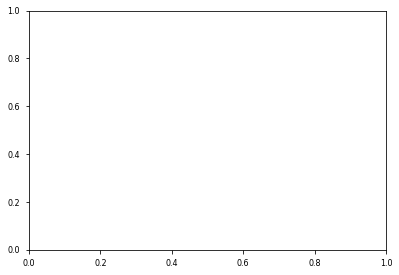

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
rain = sm.graphics.rainbowplot(data = pro.mras, xdata = pro.cult, ax = ax)